In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [281]:
df = pd.read_csv("AAPL.csv", index_col="Date", parse_dates=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101073,469033600.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095800,175884800.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088768,105728000.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090965,86441600.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093603,73449600.0
...,...,...,...,...,...,...
2021-01-25,143.070007,145.089996,136.539993,142.919998,142.919998,157611700.0
2021-01-26,143.600006,144.300003,141.369995,143.160004,143.160004,98390600.0
2021-01-27,143.429993,144.300003,140.410004,142.059998,142.059998,140843800.0


In [282]:
print(df.isna().sum())
df.dropna(inplace=True)
df.isna().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [283]:
# Return(t) = (Price(t+1) - Price(t))/Price(t)
df["daily future returns"] = (df["Adj Close"].shift(-1) - df["Adj Close"]) / df["Adj Close"]
df

,Open,High,Low,Close,Adj Close,Volume,daily future returns
Date,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101073,469033600.0,-0.052170
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095800,175884800.0,-0.073403
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088768,105728000.0,0.024750
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090965,86441600.0,0.029000
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093603,73449600.0,0.061024
...,...,...,...,...,...,...,...
2021-01-25,143.070007,145.089996,136.539993,142.919998,142.919998,157611700.0,0.001679
2021-01-26,143.600006,144.300003,141.369995,143.160004,143.160004,98390600.0,-0.007684
2021-01-27,143.429993,144.300003,140.410004,142.059998,142.059998,140843800.0,-0.034985


In [284]:
# pd.Series(index=df.index, data=np.random.choice([True, False], size=len(df.index), p=[0.5, 0.5]))
signal = pd.Series(index=df.index, data=np.random.randint(0, 2, len(df.index)))
print(signal)
df["long_only_signal"] = signal
df

Date
1980-12-12    1
1980-12-15    0
1980-12-16    1
1980-12-17    0
1980-12-18    1
             ..
2021-01-25    1
2021-01-26    0
2021-01-27    0
2021-01-28    0
2021-01-29    1
Length: 10118, dtype: int64


,Open,High,Low,Close,Adj Close,Volume,daily future returns,long_only_signal
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101073,469033600.0,-0.052170,1
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095800,175884800.0,-0.073403,0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088768,105728000.0,0.024750,1
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090965,86441600.0,0.029000,0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093603,73449600.0,0.061024,1
...,...,...,...,...,...,...,...,...
2021-01-25,143.070007,145.089996,136.539993,142.919998,142.919998,157611700.0,0.001679,1
2021-01-26,143.600006,144.300003,141.369995,143.160004,143.160004,98390600.0,-0.007684,0
2021-01-27,143.429993,144.300003,140.410004,142.059998,142.059998,140843800.0,-0.034985,0


In [285]:
df["Pnl"] = df["long_only_signal"] * df["daily future returns"]
df

,Open,High,Low,Close,Adj Close,Volume,daily future returns,long_only_signal,Pnl
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101073,469033600.0,-0.052170,1,-0.052170
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095800,175884800.0,-0.073403,0,-0.000000
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088768,105728000.0,0.024750,1,0.024750
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090965,86441600.0,0.029000,0,0.000000
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093603,73449600.0,0.061024,1,0.061024
...,...,...,...,...,...,...,...,...,...
2021-01-25,143.070007,145.089996,136.539993,142.919998,142.919998,157611700.0,0.001679,1,0.001679
2021-01-26,143.600006,144.300003,141.369995,143.160004,143.160004,98390600.0,-0.007684,0,-0.000000
2021-01-27,143.429993,144.300003,140.410004,142.059998,142.059998,140843800.0,-0.034985,0,-0.000000


In [286]:
return_strategy_1 = df["Pnl"].sum() / df["long_only_signal"].sum()
return_strategy_1

np.float64(0.0011095356360814063)

In [287]:
# always buy
# daily pnl
pnl = 1 * df["daily future returns"]
print(pnl)

# total pnl
print(pnl.sum())

Date
1980-12-12   -0.052170
1980-12-15   -0.073403
1980-12-16    0.024750
1980-12-17    0.029000
1980-12-18    0.061024
                ...   
2021-01-25    0.001679
2021-01-26   -0.007684
2021-01-27   -0.034985
2021-01-28   -0.037421
2021-01-29         NaN
Name: daily future returns, Length: 10118, dtype: float64
11.399970243183242


In [288]:
return_strategy_2 = pnl.sum() / (1 * len(df))
return_strategy_2 

np.float64(0.00112670194140969)

In [289]:
print(df['Pnl'])
print(df['Pnl'].cumsum())

Date
1980-12-12   -0.052170
1980-12-15   -0.000000
1980-12-16    0.024750
1980-12-17    0.000000
1980-12-18    0.061024
                ...   
2021-01-25    0.001679
2021-01-26   -0.000000
2021-01-27   -0.000000
2021-01-28   -0.000000
2021-01-29         NaN
Name: Pnl, Length: 10118, dtype: float64
Date
1980-12-12   -0.052170
1980-12-15   -0.052170
1980-12-16   -0.027420
1980-12-17   -0.027420
1980-12-18    0.033603
                ...   
2021-01-25    5.777352
2021-01-26    5.777352
2021-01-27    5.777352
2021-01-28    5.777352
2021-01-29         NaN
Name: Pnl, Length: 10118, dtype: float64


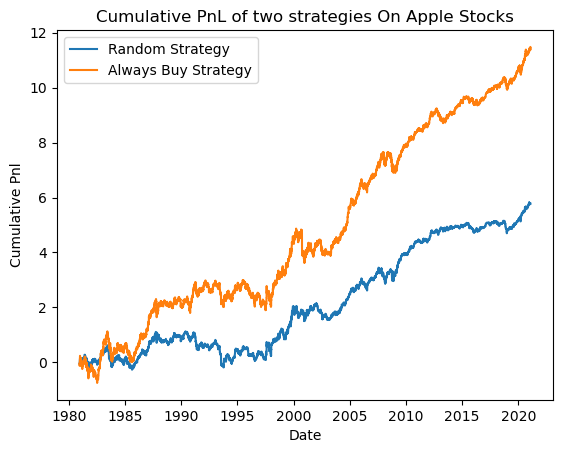

In [290]:
plt.plot(df.index, df["Pnl"].cumsum(), label="Random Strategy")
plt.plot(df.index, pnl.cumsum(), label="Always Buy Strategy")

plt.title("Cumulative PnL of two strategies On Apple Stocks")
plt.xlabel("Date")
plt.ylabel("Cumulative Pnl")
plt.legend()